First, let's import pandas and matplotlib to our workspace and also the developer survey data which we just downloaded from stack overflow into the project folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

After executing the above cell, let's display the fist few columns for our dataset.

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


As you can see, this dataset is very large with 61 columns and a lot of missing data, so let's start cleaning the dataset and also keep only few columns which we will be using later.

**Those are..**<br>
1. `country`= The Country our developer is from.
2. `Edlevel` = His education level
3. `YearsCodePro` = Experience 
4. `Employment` = His employment status, whether he worked full-time or part-time 
5. `ConvertedComp` = Lastly, his salary which is coverted to US dollars.

Then, let's select those columns and also rename `ConvertedComp` to `Salary`.

In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename ({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


Now, you can see we have only 5 columns.

But if you want you can add even more columns, it will help us to train our model much more efficiently later. But, I don't want to bother our user with more information which he or she as to fill out. So I'm using only these data points to predict our salary.

Then there are also so many null values and missing information in the `salary` data point, which we don't want. Let's filter those in our next step.

In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


Now you can see there are no null values in the data points.

Let's see the information we have now from our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


That displays the information about our dataset. As you can see we have 34,756 entries, columns which we selected earlier and also it's data type which much more info.

Now the next thing we want to do is we also want to drop all the rows where one of those columns is null.

In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

When we inspect the data frame, we got a zero for each column. So now we are using only data points where we have data.

I know, getting rid of all this data is not a radical approach of cleaning the data, there are other approaches you can use. For example, you can fill in missing data with the mean of column.

But in this case we still have enough data points available so it should be fine to just drop them.

---

Then the next thing we want to do is we only want to keep the data points where the user was employed full time. And also drop employment column, since we won't using it as an input from user while predicting the salary.

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


#### Next, we need to clean the country data

In [8]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

Now we can see how many data points we have from each country, here we have the most data from the United States, then India and also so many countries which have only one data point. So let's now get rid of all the smaller countires.

In no do i want to offend these countries so, I'm sure there are great developers there, but the thing is if  we use only one data point from a country, then this might actually confuse our model because it can't really learn from this one data point, so for this reason we need to get rid of the countries where we have only few values.

In order to clean the countires we have this funtion, which takes two parameters. One is the value counts we got above, second is the cutoff value which we will campare againt the value count of each country. There we will keep only those countries, whose value count is greater than the cutoff value, remaining countries will be combined together to form a new category called other.

In [9]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

You can see we have kept only these contires, remaining are combined in a saperate category called other at the top.

#### Now let's inspect the salary range and for this I want to plot a graph against salary and country.

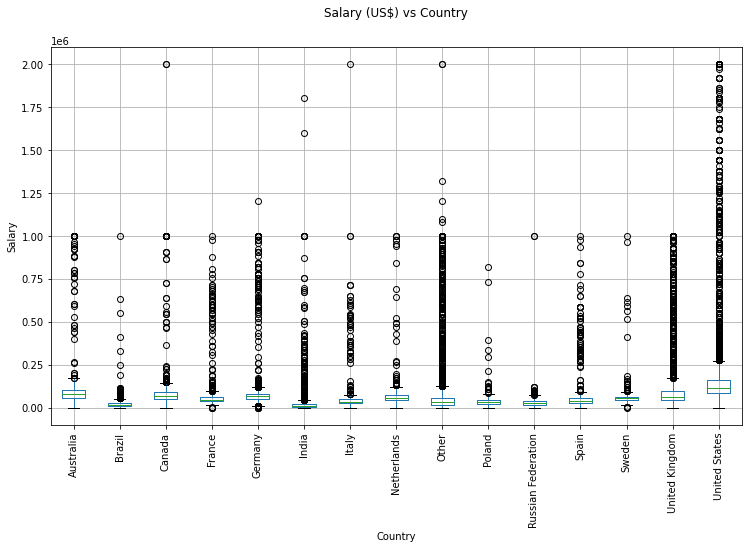

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

So here you can see the box plot and we see the different countries on the x-axis and then we have the salary ranging from zero, all the way to 2 million.

The way a box plot can be interpreted is that the small box-like area you see at the range 0 to 0.25 is the median value and all the remaining points are outliers.

**_Outlier: In statistics, an outlier is a data point that differs significantly from other observations._**

As you can see, most data points are in this median area, so we want to keep only the data where we have the most information. Since, these median values doesn't reach over 250,000 USD, let's define this as a cutoff value and keep only salaries ranging from cutoff value and minimum cutoff value i.e., 10,000 USD.

In [12]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

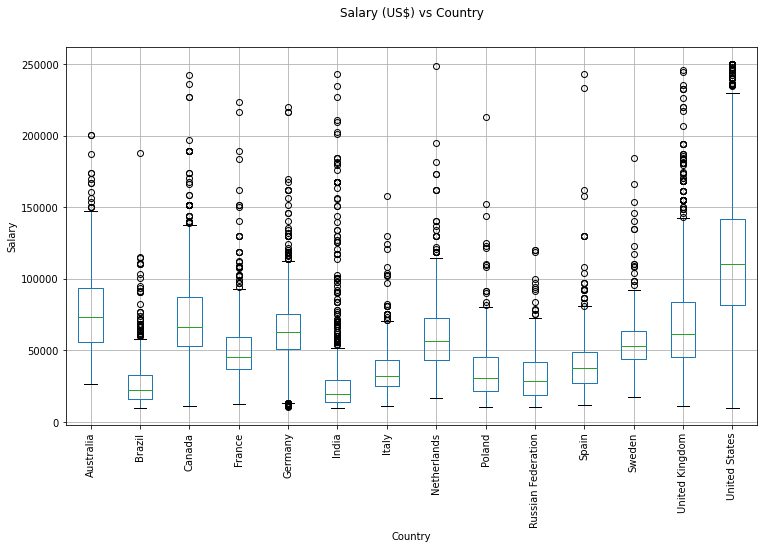

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

Now we can better dectect these boxes here and see where the median range is and still we have outliers, but not so many as before.

### Then the next thing we need to clean is the `yearscodepro`.

In [14]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

If we inspect the output, you can we have two strings, i.e., `Less than 1 year` and `More than 50 years`. I want to convert these values into a float. To do that I'll define a function which returns 50 for `More than 50 years` and 0.5 for `Less than 1 year`.

In [15]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

#### Now we want to do a similar thing with the education level 

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

As you can see there are so many answers, but I want to keep only few. 

So I define a function which returns `Bachelor's degree`, `Master's degree`, then combine `Professional degree` and `Other doctoral` to return `Post grad`. Then finally return `Less than a Bachelors` for all remaining answers.

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)


In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

We are almost done with cleaning the data but we still have one problem and this is because some of our data, for example the number of years of experience is a float, but the education level and the country is a string.

So our model can't really understand the string, so we need transform the string values to a unique value which is a number that our model can understand.

In order to transform this data, we can use the label encoder from sklearn.

In [19]:
#Education Level
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [20]:
#Country
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

Finally, our cleaning process is done. Now we can start training our model.

---
In order to do that we need to split our data into label and features. Label is the salary we predict and features are the rest of the columns like education level, country and experience.

Since, we are trying to predict salary of the developer here. Let's drop that salary column from features and assign it to a label called y.

In [21]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

Now we should try out different machine learning models and for this we are using scikit-learn library.

In this case we deal with a regression problem and this means that here we don't predict a defined category like cat or but, but here we predict a number and the number can be anything from I don't know like 0 to 1 million so that's why this is a regression and not a classification.

And for this, the first obvious choice is the linear regression model.

In [22]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [23]:
y_pred = linear_reg.predict(X)

Now in order to evaluate how good our model performs. We usually have to look at thw mean squared error or you can also have a look at the mean absolute error, which you should from sklearn as below.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

Then we need to calculate the `mean_squared_error` bases on the actual labels y and the new predicted label `y_pred` above. Then we calculate the sqaure of `mean_squared_error` using numpy. This will be our error.

In [25]:
error

39274.75368318509

If we look at the error, our model on average is off by 39274 dollors, which is pretty high. So let's try out a different model.

So the next model we want to try out is the decision tree regressor, the cocept is similar as above.

In [26]:
from  sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [27]:
y_pred = dec_tree_reg.predict(X)

In [28]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,414.94


It's better compared to last time, but let's try one more.

i.e., Random Forest Regressor, this will basically combine multiple decision tree regressor into a forest.

Let's approach the same method like before.

In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [30]:
y_pred = random_forest_reg.predict(X)

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,487.31


This time the error is still 29,000, so it's not really better than the decision tree.

But what we didn't consider yet is that for each of these models we also can use different parameter values that we can put in. In order to find the best model with the best parameters, there is a `GridSearchCV` method, which stands for grid search with cross validation and the way this works is we import this and then we define the set of different parameters we want to try out. 

Let's quite complecated, so I suggest you to check scikit documentation.

In [32]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = { "max_depth": max_depth }

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

Once we ran the model, it basically looped over all the different parameters that we put in and tried out all the different parameters and each time evaluates the error and then chooses the best model for us. Now we can get the best estimator by running the following code

In [33]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,428.51


In [34]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


Let's say in our app later, we will get a new array of information from our user.

Following is the way you can fit those new information to the regressor and predict the salary.

In [35]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [36]:
X[ :, 0] = le_country.transform(X[:,0])
X[ :, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [37]:
y_pred = regressor.predict(X)
y_pred

array([139427.26315789])

That gives us a predicted salary, but before we can use this method in our app, we have save our model and for this we use pickles.

In [38]:
import pickle

In [39]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [40]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [41]:
y_pred = regressor_loaded.predict(X)
y_pred

array([139427.26315789])